Exercise 1 Regression
Imports

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


Ordinary Least Squares Regression

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        21:34:36   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err

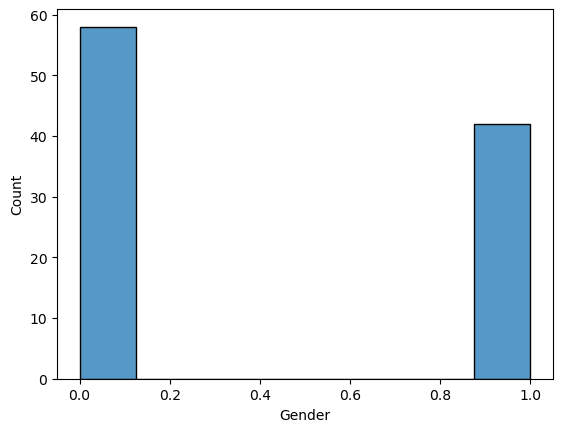

In [44]:
df = pd.read_csv('dataUsed/data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # removes unamed column (https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe)

print(df.corr(method='pearson')['SUS'].sort_values()) # display pearson coefficient

x = df.drop(columns='SUS')
y = df['SUS']

x = sm.add_constant(x) # add intercept 
regressionModel = sm.OLS(y,x).fit()

print(regressionModel.summary()) # display OLS summary

sns.histplot(data=df['Gender'], palette='bright')
plt.show()
# display gender to showcase slightly higher number of females


2. Statistically influential variables (in order of influence)
   1. Duration: P-vlaue of 0.980
      2. Purchase: P-vlaue of 0.716
   2. Gender: P-value of 0.672

    Statisically uninfluential variable 
    ASR_Error and Intent_Error both had a P-value of under 0.05

3. These results are relatively as expected. Duration being the most significant feature is expected as many users who use the system for a longer time are more likely to be expected to fill out a SUS as they longer a system is used they are more likely to have stronger opinions on it. Purchase and gender having a similar impact surprised me. Purchase having a larger effect is not as surprising due to the fact that many people making a purchase are likely to spend a longer time talking with Siri. However, I did not expect there to be a slight correlation between gender and the SUS scores. 

4. The most influential factor on SUS is the duration, as shown by the P-value being almost 1 at 0.980.

5. The potential reasons for duration being the most signficant could be that users who spend more time interacting with Siri are more likely to enjoy their interactions and want to leave a positive review or become frusturated with the system and leave a negative review. The potential reason for purchase to be a significant factor relates to the that users who make purchases using Siri are more likely to spend a longer time using the system, causing them to have a higher duration. A potential reason for gender to be a significant predictor of SUS score could relate to one gender tending to purchase flights more often, thus causing them to have a longer duration using the system. It could also come from imbalance in the data as shown above, and that there are more represented in the data.

Regression Analysis

In [49]:
#Evalute using MSE
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

lr = LinearRegression().fit(x_train, y_train)

yTrainPred = lr.predict(x_train)
yTestPred = lr.predict(x_test)

print("The MSE of the linear regression model is: ", mean_squared_error(y_test, yTestPred))
print("The R^2 value is ", lr.score(x_test, y_test))



The MSE of the linear regression model is:  71.61708525873807
The R^2 value is  0.6627562381863907
